In [1]:
import torch 
from torch.nn import Linear 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
w = torch.tensor(23.8, requires_grad=True) 
b = torch.tensor(2.6, requires_grad=True)

In [ ]:
def forward(x):
    y = w*x + b
    return y 

In [ ]:
x = torch.tensor([[4],[7]])
o = forward(x)
o

tensor([[ 97.8000],
        [169.2000]], grad_fn=<AddBackward0>)

Standarised Linear Class implmentations 

In [ ]:
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [ ]:
x = torch.tensor([[2.0], [3.3], [7.6]])
model(x)

tensor([[0.5891],
        [1.2590],
        [3.4746]], grad_fn=<AddmmBackward>)

### Custom Modules


In [ ]:
torch.manual_seed(1)
class LR(nn.Module):
    def __init__(self, in_size, output_size):
        super().__init__()
        self.linear = nn.Linear(in_size, output_size)
    def forward(self,x):
        pred = self.linear(x)
        return pred


In [ ]:
new_model = LR(1,1)
print(list(new_model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [ ]:
xx = torch.tensor([[1.0],[2.0],[3.0]])
new_model.forward(xx)

tensor([[0.0739],
        [0.5891],
        [1.1044]], grad_fn=<AddmmBackward>)

### Make Predictions with real data

Text(0.5, 0, 'X')

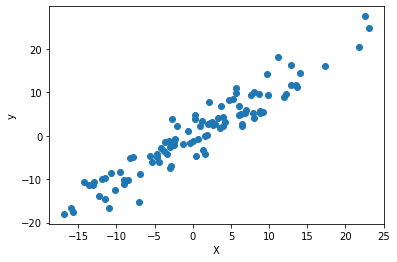

In [2]:
X = torch.randn(100,1)*10
y = X + torch.randn(100,1)*3
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel("y")
plt.xlabel("X")

In [3]:
class LRNet(nn.Module):
    def __init__(self, in_size, out_size):
        super().__init__()
        self.lin = nn.Linear(in_size, out_size)
    def forward(self,x):
        x = self.lin(x)
        return x

In [4]:
torch.manual_seed(1)
model = LRNet(1,1)

In [5]:
def get_params(model):
    [w,b] = model.parameters()
    w1 = w[0][0].item()
    b1 = b[0].item()
    return (w1,b1)
get_params(model)

(0.5152631998062134, -0.44137823581695557)

In [6]:
def plot_fit(title, model):
    plt.title = title
    w1, b1 = get_params(model)
    x1 = np.array([-30,30])
    y1 = w1*x1 + b1
    plt.plot(x1,y1, "r")
    plt.scatter(X, y)
    plt.show()

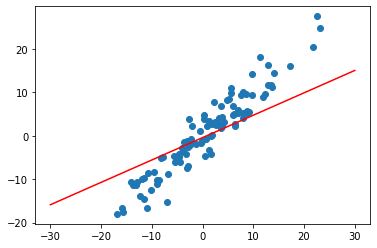

In [7]:
plot_fit("Inital model", model)

In [8]:
criertion = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=0.01)

In [9]:
epochs = 150
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criertion(y_pred,y)
    print("epoch: ",i, " Loss: ", loss.item())
    
    losses.append(loss)
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

epoch:  0  Loss:  26.968576431274414
epoch:  1  Loss:  13.405691146850586
epoch:  2  Loss:  9.644532203674316
epoch:  3  Loss:  8.598679542541504
epoch:  4  Loss:  8.305137634277344
epoch:  5  Loss:  8.22014045715332
epoch:  6  Loss:  8.1930570602417
epoch:  7  Loss:  8.182153701782227
epoch:  8  Loss:  8.175868034362793
epoch:  9  Loss:  8.170987129211426
epoch:  10  Loss:  8.166621208190918
epoch:  11  Loss:  8.162515640258789
epoch:  12  Loss:  8.158596992492676
epoch:  13  Loss:  8.154838562011719
epoch:  14  Loss:  8.151230812072754
epoch:  15  Loss:  8.1477632522583
epoch:  16  Loss:  8.144434928894043
epoch:  17  Loss:  8.141236305236816
epoch:  18  Loss:  8.138162612915039
epoch:  19  Loss:  8.135210990905762
epoch:  20  Loss:  8.132375717163086
epoch:  21  Loss:  8.129651069641113
epoch:  22  Loss:  8.127034187316895
epoch:  23  Loss:  8.124520301818848
epoch:  24  Loss:  8.122105598449707
epoch:  25  Loss:  8.119784355163574
epoch:  26  Loss:  8.117554664611816
epoch:  27  Lo

Text(0.5, 0, 'Epochs')

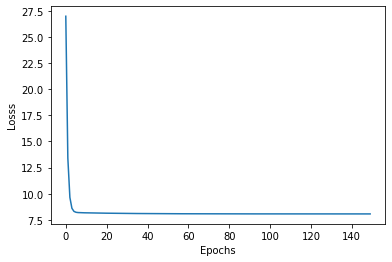

In [10]:
plt.plot(range(epochs),losses)
plt.ylabel("Losss")
plt.xlabel("Epochs")

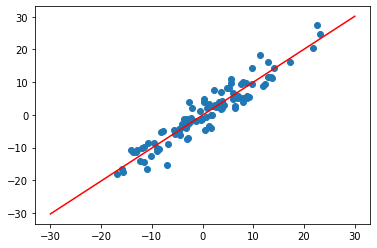

In [11]:
plot_fit("New Model", model)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1f2c43c5-a4e6-49b6-bbf9-a3058ab537e6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>